In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_excel('heart.xlsx')

In [130]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [131]:
df.shape

(299, 13)

In [132]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

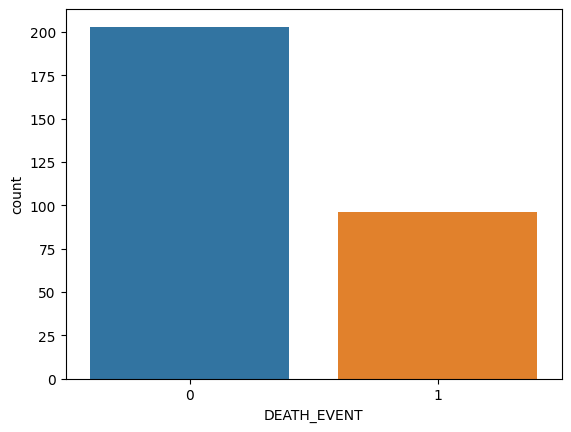

In [133]:
sns.countplot(x = 'DEATH_EVENT', data = df)

<Axes: xlabel='diabetes', ylabel='count'>

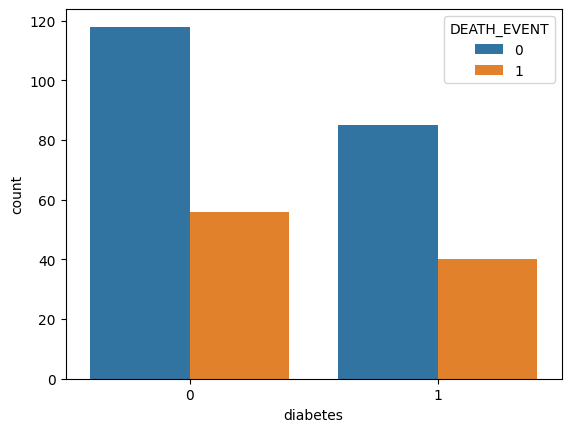

In [134]:
sns.countplot(x = 'diabetes', hue = 'DEATH_EVENT', data = df)

In [135]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation for every column'}>

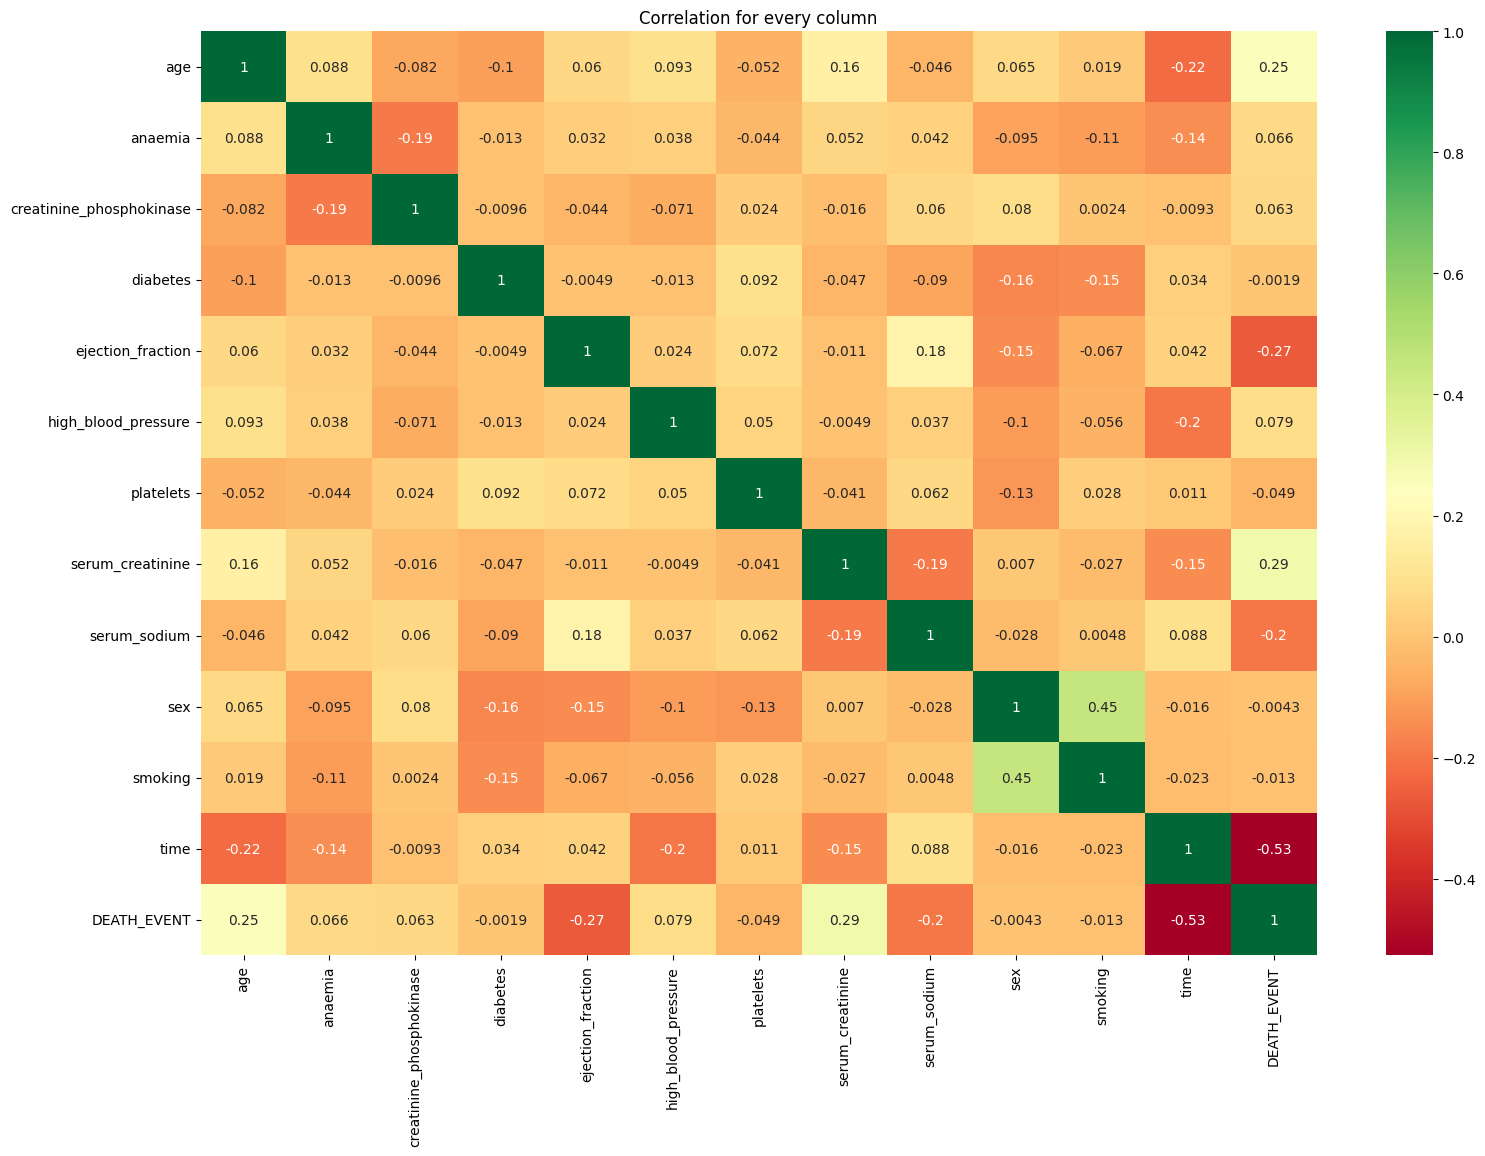

In [136]:
plt.figure(figsize = (18, 12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

# Separate X, Y

In [137]:
x = df.drop('DEATH_EVENT', axis = 1)

In [138]:
y = df[['DEATH_EVENT']]

In [139]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [140]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [141]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 42)

In [142]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [143]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [144]:
xtrain.shape

(209, 12)

In [145]:
xtest.shape

(90, 12)

In [146]:
dt = DecisionTreeClassifier()

In [147]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

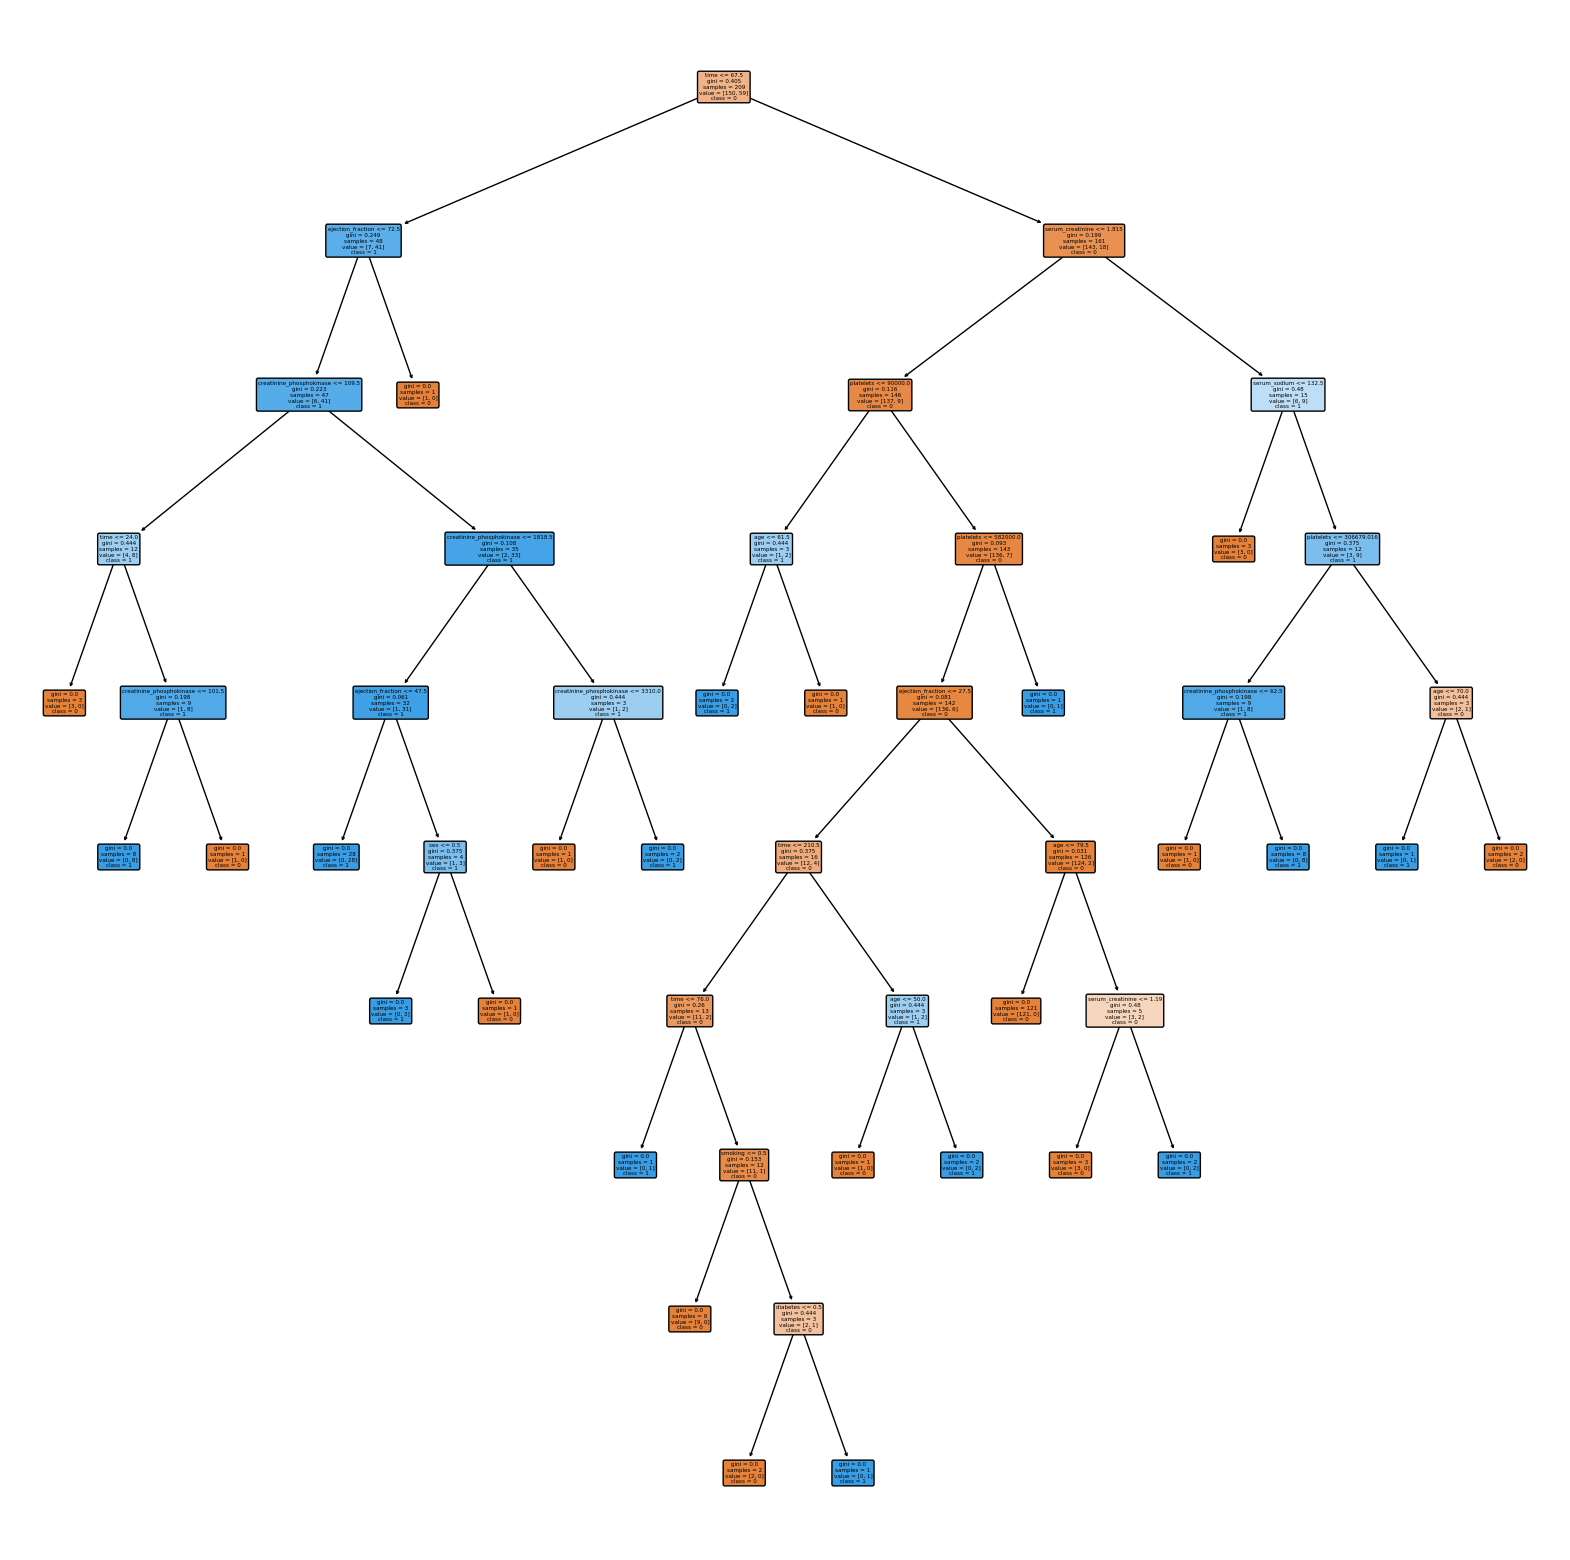

In [148]:
plt.figure(figsize = (20, 20))
tree.plot_tree(dt, filled = True, rounded = True, feature_names = x.columns, class_names = ['0', '1'])
plt.savefig('tree.png', dpi = 1200)

In [149]:
pred = dt.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [150]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confusion Matrix

In [151]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.69      0.81      0.75        53\n           1       0.64      0.49      0.55        37\n\n    accuracy                           0.68        90\n   macro avg       0.67      0.65      0.65        90\nweighted avg       0.67      0.68      0.67        90\n'

In [152]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        53
           1       0.64      0.49      0.55        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.65        90
weighted avg       0.67      0.68      0.67        90



In [153]:
cm = confusion_matrix(ytest, pred)
cm

array([[43, 10],
       [19, 18]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

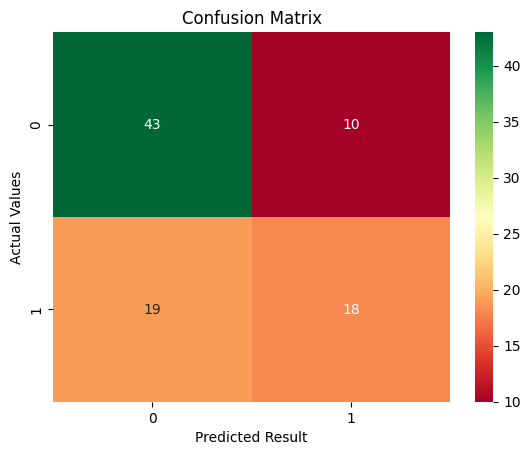

In [154]:
sns.heatmap(cm, annot = True, cmap = 'RdYlGn')
plt.xlabel('Predicted Result')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [155]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [156]:
tp

43

In [157]:
fn

10

In [158]:
fp

19

In [159]:
tn

18

In [160]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.6777777777777778

In [161]:
precision = tp / (tp + fp)
precision

0.6935483870967742

In [163]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

Text(0.5, 1.0, 'ROC Curve')

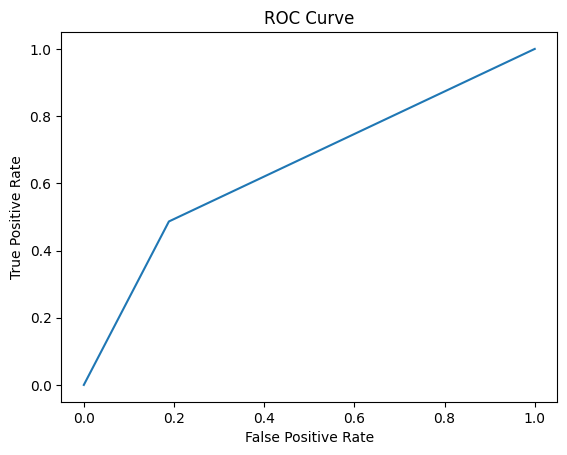

In [165]:
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [166]:
accuracy_score(ytest, pred)

0.6777777777777778

In [168]:
dt.score(xtest, ytest)

0.6777777777777778